In [67]:
import os
print(os.getcwd())


C:\Users\mahmoody\Desktop\gait_project\notebooks


synthetic signals for right and left foot motion

In [70]:
import numpy as np
import pandas as pd
fs = 100
time = np.arange(0 , 10 , 1/fs)

right_z = 0.02 * np.sin(2 * np.pi * time * 1.2) + 0.01
left_z = 0.02 * np.sin(2 * np.pi * time * 1.2 + np.pi) + 0.01

right_z += np.random.normal(0 , 0.002 , len(time))
left_z += np.random.normal(0 , 0.002 , len(time))

df = pd.DataFrame({
    "time" : time,
    "foot_right_z_m" : right_z,
    "foot_left_z_m" : left_z
})

df.to_csv("../data/synthetic_gait.csv", index = False)
print("done")
df.head()

done


,time,foot_right_z_m,foot_left_z_m
0,0.00,0.008964,0.009194
1,0.01,0.015160,0.010589
2,0.02,0.012425,0.005659
3,0.03,0.013318,0.007843
4,0.04,0.017134,0.002219


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("../data/synthetic_gait.csv")
df.head()

,time,foot_right_z_m,foot_left_z_m
0,0.00,0.008964,0.009194
1,0.01,0.015160,0.010589
2,0.02,0.012425,0.005659
3,0.03,0.013318,0.007843
4,0.04,0.017134,0.002219


height trajectories for both feet

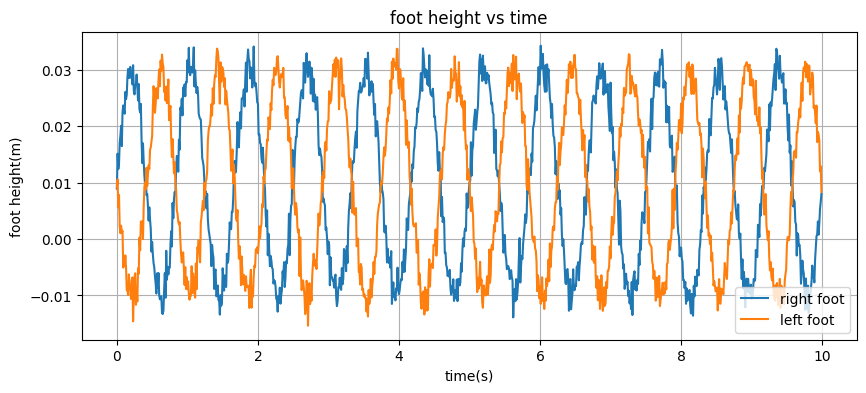

In [77]:
time = df["time"].values
right_z = df["foot_right_z_m"].values
left_z = df["foot_left_z_m"].values

plt.figure(figsize = (10,4))
plt.plot(time ,right_z ,label = "right foot")
plt.plot(time ,left_z , label = "left foot")

plt.xlabel("time(s)")
plt.ylabel("foot height(m)")
plt.title("foot height vs time")
plt.legend()
plt.grid(True)

heel strike points for Right foot

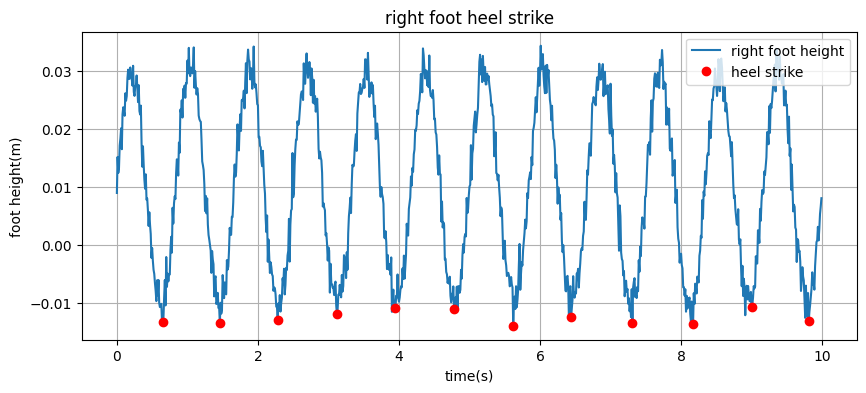

In [80]:
from scipy.signal import find_peaks

inverted_right = -right_z

peaks, _ = find_peaks(inverted_right , distance = 80)
plt.figure(figsize = (10,4))
plt.plot(time ,right_z ,label = "right foot height")
plt.plot(time[peaks] ,right_z[peaks] ,"ro" ,label = "heel strike")
plt.xlabel("time(s)")
plt.ylabel("foot height(m)")
plt.title("right foot heel strike")
plt.legend()
plt.grid(True)
plt.show()

heel strike points for both feet

right hs times: [0.65 1.46 2.28 3.12 3.95 4.78 5.62 6.44 7.31 8.17 9.   9.81]
left hs times: [0.23 1.03 1.88 2.71 3.56 4.36 5.19 6.06 6.89 7.7  8.52 9.41]


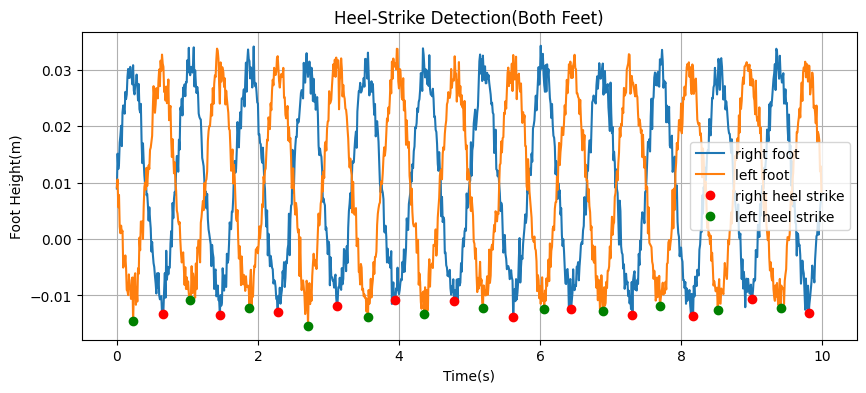

In [83]:
peaks_r, _ = find_peaks(-right_z , distance = 80)
hs_t_r = time[peaks_r]

peaks_l, _ = find_peaks(-left_z , distance = 80)
hs_t_l = time[peaks_l] 

print("right hs times:" , np.round(hs_t_r,3))
print("left hs times:" , np.round(hs_t_l,3))

plt.figure(figsize = (10,4))
plt.plot(time, right_z, label = "right foot")
plt.plot(time, left_z, label = "left foot")
plt.plot(hs_t_r ,right_z[peaks_r], "ro" , label = "right heel strike")
plt.plot(hs_t_l, left_z[peaks_l] , "go" , label = "left heel strike")
plt.xlabel("Time(s)")
plt.ylabel("Foot Height(m)")
plt.title("Heel-Strike Detection(Both Feet)")
plt.legend()
plt.grid(True)
plt.show()

metrics (stride time and cadence)

In [94]:
# Calculating the mean and standard deviation

def mean_and_std (x):
    return np.nanmean(x) , np.nanstd(x)

# Calculating the stride time

stride_r = np.diff(hs_t_r)
stride_l = np.diff(hs_t_l)
m_stride_r , s_stride_r = mean_and_std(stride_r)
m_stride_l , s_stride_l = mean_and_std(stride_l)

# calculating cadence

cadence_r = 120 / m_stride_r
cadence_l = 120 / m_stride_l
cadence_mean = np.nanmean([cadence_r, cadence_l])

# Normal or Irregular Walking Pattern

std_threshold = 0.05
status_r = "normal" if s_stride_r < std_threshold else "irregular"
status_l = "normal" if s_stride_l < std_threshold else "irregular"

print("Gait Summary Report:")
print(f"Right Stride Time : {m_stride_r:.3f} ± {s_stride_r:.3f} sec   →  {status_r}")
print(f"Left  Stride Time : {m_stride_l:.3f} ± {s_stride_l:.3f} sec   →  {status_l}")
print(f"Cadence (average) : {cadence_mean:.1f} steps/min")
if 70 < cadence_mean < 90 :
        print("slow walking")
elif 90 < cadence_mean < 120 :
        print("normal walking")
elif 120 < cadence_mean < 150 :
        print("fast walking")

Gait Summary Report:
Right Stride Time : 0.833 ± 0.018 sec   →  normal
Left  Stride Time : 0.835 ± 0.027 sec   →  normal
Cadence (average) : 143.9 steps/min
fast walking
